In [1]:
import matplotlib.pylab as plt
import pickle
import numpy as np
import os

In [2]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
import ising2

In [ ]:
sizes = [2, 4, 8]
mcsteps = [1e4, 1e5, 5e5]

In [24]:
ising2.main(sizes=sizes, mcsteps=mcsteps)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [25]:
from itertools import product

In [26]:
import pandas as pd

In [29]:
results = {s: {} for s in sizes}

for size, resultsize in results.items():
    resultsize.update({nsteps: {} for nsteps in mcsteps})

for size, steps in product(sizes, mcsteps):
    results[size][steps] = pd.read_csv(f'results_{size}x{size}_{steps}.dat', header=0)

Text(0.5, 0, 'T')

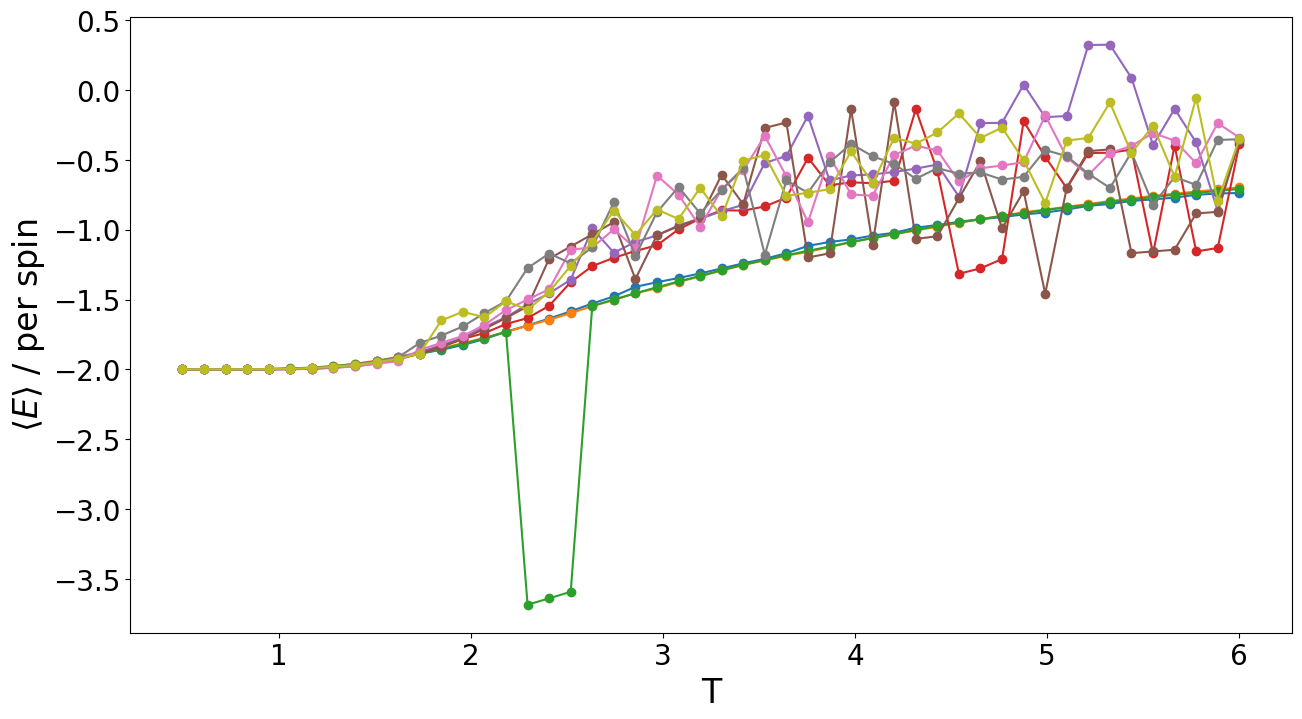

In [30]:
for size, resultsize in results.items():
    for nsteps, resultsizestep in resultsize.items():
        plt.plot(resultsizestep['T'], resultsizestep['Emean']/size**2,'-o')
plt.ylabel(r'$\langle E \rangle$ / per spin')
plt.xlabel('T')

Text(0.5, 0, 'T')

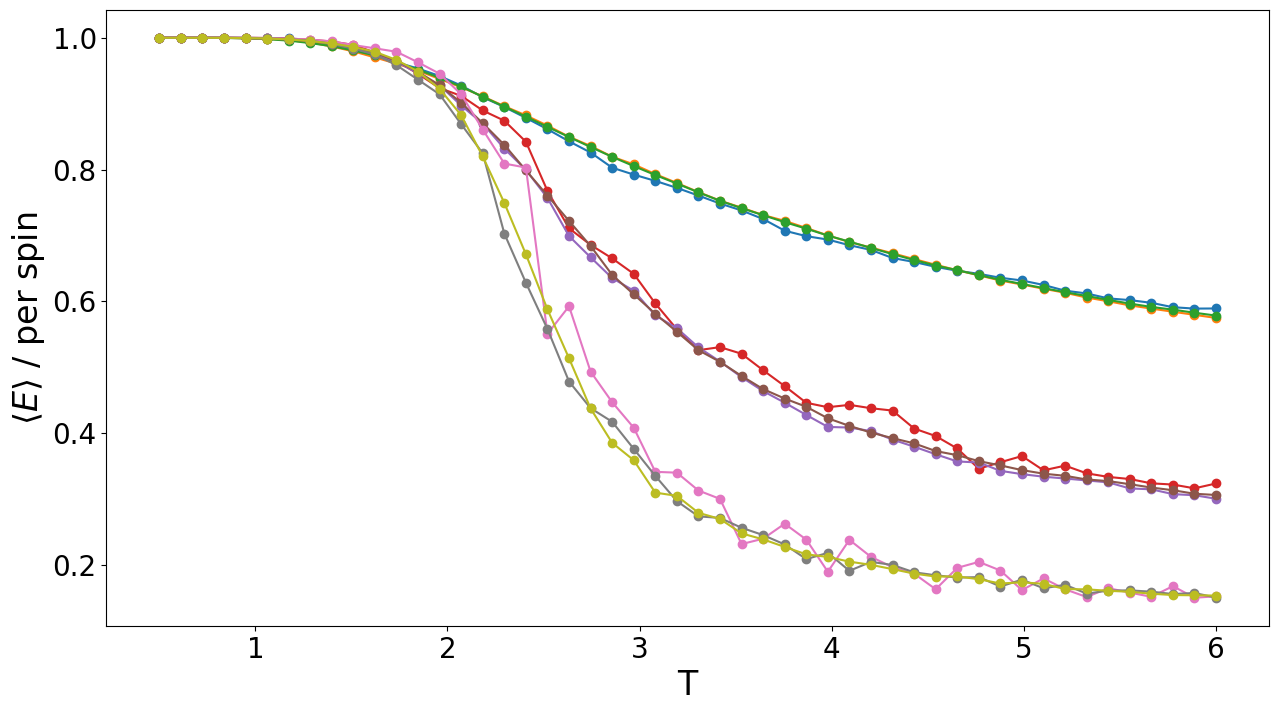

In [36]:
for size, resultsize in results.items():
    for nsteps, resultsizestep in resultsize.items():
        plt.plot(resultsizestep['T'], resultsizestep['MabsMEAN']/size**2,'-o')
plt.ylabel(r'$\langle E \rangle$ / per spin')
plt.xlabel('T')

In [31]:
for size, thisresult in results.items():
    for steps, result in thisresult.items():
        result['CV'] = (result['E2mean'] - result['Emean']**2)/result['T']**2

Text(0, 0.5, '$\\langle C_v \\rangle$')

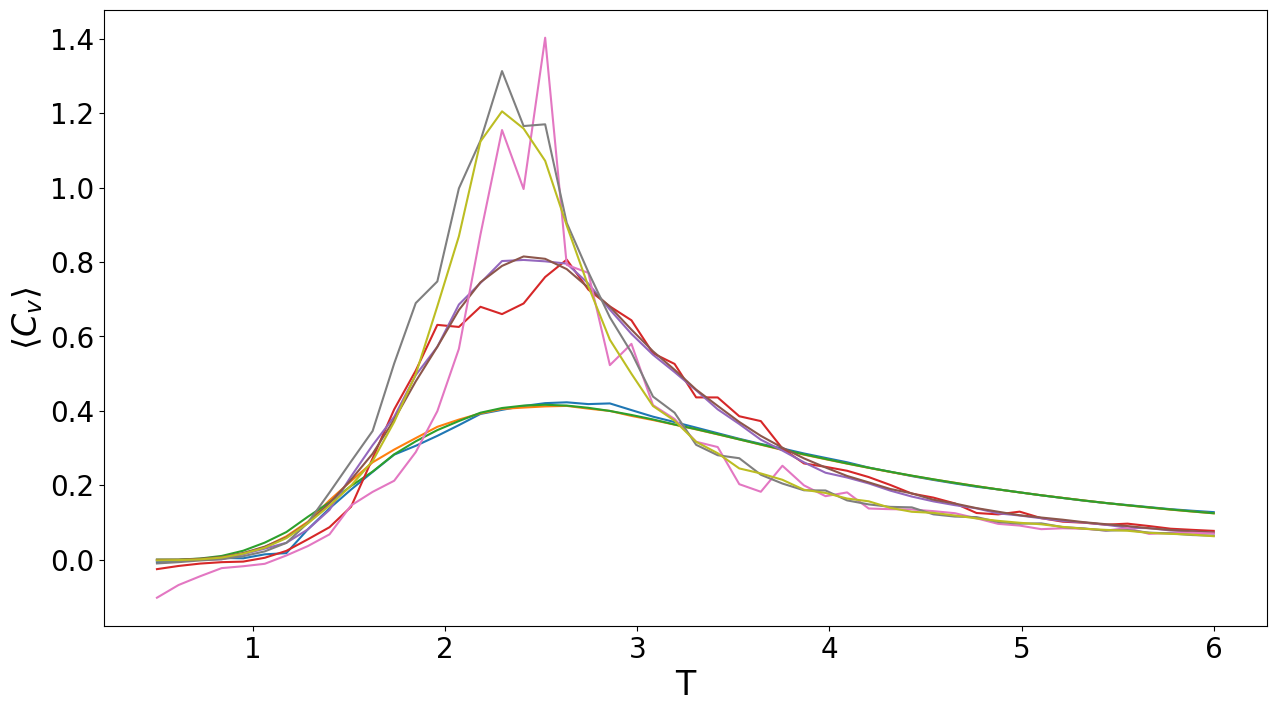

In [32]:
for size, thisresult in results.items():
    for steps, result in thisresult.items():
        plt.plot(result['T'], result['CV']/size**2)
plt.xlabel('T')
plt.ylabel(r'$\langle C_v \rangle$')

In [33]:
for size, thisresult in results.items():
    for steps, result in thisresult.items():
        result['X'] = (result['M2acum'] - result['MabsMEAN']**2)/result['T']

Text(0, 0.5, '$\\langle \\chi \\rangle$')

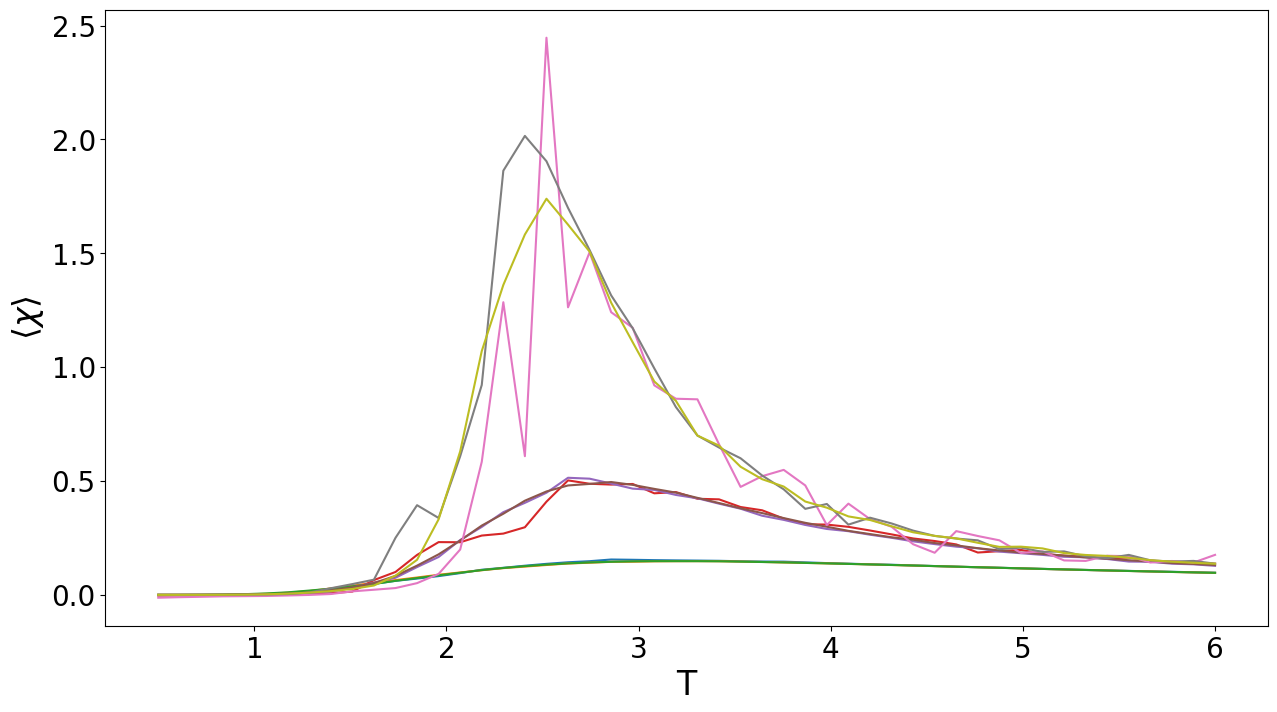

In [34]:
for size, thisresult in results.items():
    for steps, result in thisresult.items():
        plt.plot(result['T'], result['X']/size**2)
plt.xlabel('T')
plt.ylabel(r'$\langle \chi \rangle$')